In [20]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
plt.style.use("seaborn")

In [2]:
#Downloading info
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info'
url_file = requests.get(url)
with open("covtype.info","wb") as file:
    file.write(url_file.content)  

### Loading Data set

In [3]:
#Loading data set
df_trees = pd.read_csv("covtype.csv")
df_trees.head(1)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5


In [4]:
# The columns Soil_Typex are redundant, aren't they?
soils = []
for i in range(1,41):
    soils.append("Soil_Type"+str(i))

# Checking that there is only one wilderness area per observation
print(df_trees[soils].sum(axis = 1).unique()) 
print(df_trees[soils].sum(axis = 0).sum())

[1]
581012


### Making Soil_Type to store the information in Soil_typex

In [5]:
for i in range(1,41):
    df_trees["Soil_Type"+str(i)] = df_trees["Soil_Type"+str(i)].apply(lambda x: int(i) if x==1 else x)

In [6]:
df_trees["Soil_Type"] = df_trees[soils].sum(axis = 1)
df_trees.drop(soils, axis=1, inplace =True)

In [7]:
df_trees["Soil_Type"].unique().shape

(40,)

### Wilderness_Area is irrelevant for the generalization. Drop them.

In [8]:
wilderness = []
for i in range(1,5):
    wilderness.append("Wilderness_Area"+str(i))

In [9]:
df_trees.drop(wilderness, axis=1, inplace =True)

In [10]:
df_trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 12 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Cover_Type                            581012 non-null int64
Soil_Type                             581012 non-null int64
dtypes: int64(12)
memory usage: 53.2 MB


In [11]:
df_trees.isnull().any()

Elevation                             False
Aspect                                False
Slope                                 False
Horizontal_Distance_To_Hydrology      False
Vertical_Distance_To_Hydrology        False
Horizontal_Distance_To_Roadways       False
Hillshade_9am                         False
Hillshade_Noon                        False
Hillshade_3pm                         False
Horizontal_Distance_To_Fire_Points    False
Cover_Type                            False
Soil_Type                             False
dtype: bool

In [12]:
df_trees.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,2.051471,24.362443
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,1.396504,9.485405
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,1.000000,20.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,2.000000,29.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,2.000000,31.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,7.000000,40.000000


In [13]:
#Saving to a file
df_trees.to_csv("Trees_clean.csv",index=False)

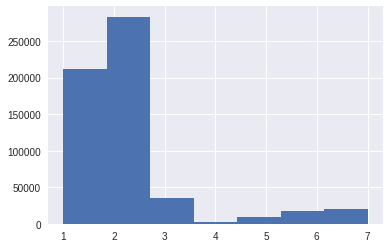

In [14]:
plt.hist(df_trees["Cover_Type"],7);

In [15]:
df_trees["Cover_Type"][df_trees["Cover_Type"]==2].count()/df_trees["Cover_Type"].count()

0.48759922342395684

In [16]:
df_trees["Cover_Type"][df_trees["Cover_Type"]==4].count()/df_trees["Cover_Type"].count()

0.004727957426008413

In [18]:
X = df_trees.drop("Cover_Type", axis=1)
y = df_trees["Cover_Type"]

In [22]:
X["Vertical_Distance_To_Hydrology"] = X["Vertical_Distance_To_Hydrology"] + 173

In [23]:
chi2(X,y)

(array([9.47985326e+06, 2.14678197e+05, 1.71432571e+05, 2.32260520e+06,
        1.10632486e+05, 5.76645195e+07, 6.33907064e+04, 2.97661418e+04,
        6.35879412e+04, 3.58909050e+07, 8.85709031e+05]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

### Common cover type

Looks like Cover_type 2 (Lodgepole pine) is very common (about half of the observations). Let's see if we can classify it with respect to all others. We prepare the data set to study it with other notebooks.

In [ ]:
df_common = pd.read_csv("Trees_clean.csv")
df_common["Cover_Type"].replace([1,3,4,5,6,7],0, inplace=True)
df_common["Cover_Type"].replace(2,1, inplace=True)

In [ ]:
df_common["Cover_Type"][df_common["Cover_Type"]==1].count()/df_common["Cover_Type"].count()

In [ ]:
df_common.head()

In [ ]:
df_common.to_csv("Trees_common.csv",index=False)

### Rare cover type.
Cover_type 4 (Cottonwood/Willow) is very rare and, hence, valuable. We prepare the data to study it with other notebooks.

In [ ]:
df_rare = pd.read_csv("Trees_clean.csv")
df_rare["Cover_Type"].replace([1,2,3,5,6,7],0, inplace=True)
df_rare["Cover_Type"].replace(4,1, inplace=True)

In [ ]:
df_rare.head()

In [ ]:
df_rare["Cover_Type"][df_rare["Cover_Type"]==1].count()/df_rare["Cover_Type"].count()

In [ ]:
df_rare.to_csv("Trees_rare.csv",index=False)